<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clean" data-toc-modified-id="Clean-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clean</a></span></li><li><span><a href="#Code-qui-fonctionne-et-n'overfit-pas" data-toc-modified-id="Code-qui-fonctionne-et-n'overfit-pas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Code qui fonctionne et n'overfit pas</a></span></li><li><span><a href="#Afficher-les-tests" data-toc-modified-id="Afficher-les-tests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Afficher les tests</a></span></li></ul></div>

In [30]:
tensorflow-cpu

NameError: name 'tensorflow' is not defined

In [1]:
# Data manip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Keras
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential # initialize neural network library
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten # build our layers library
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import save_model, load_model

# Clean

In [ ]:
# load dataset and split data
def load_dataset():
    # load dataset
    data = pd.read_csv("C:/Users/Simplon/Google Drive/Nasreddine/Arturo/14 - DEEP LEARNING/03 - MNIST/train.csv")
    
    # Define target-features
    y = np.array(data.iloc[:,0].values)
    X = np.array(data.iloc[:,1:].values)
    
    # Normalize the data
    X = X/255
    
    # Reshape dataset to have a single channel
    X = X.reshape((X.shape[0], 28, 28, 1))
    
    # One hot encode target values
    y = tf.keras.utils.to_categorical(y)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42, stratify=y)
    
    return X_train, X_test, y_train, y_test

In [ ]:
# define CNN model
def define_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# evaluate a model
def evaluate_model():
    # define model
    model = define_model()
    
    # fit the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    return history

In [ ]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.show()

# Code qui fonctionne et n'overfit pas

In [3]:
# load dataset
data = pd.read_csv("C:/Users/Simplon/Google Drive/Nasreddine/Arturo/14 - DEEP LEARNING/03 - MNIST/git/data/train.csv")
    
# Define target-features
y = np.array(data.iloc[:,0].values)
X = np.array(data.iloc[:,1:].values)
    
# Normalize the data
X = X/255
    
# Reshape dataset to have a single channel
X = X.reshape((X.shape[0], 28, 28, 1))
    
# One hot encode target values
y = tf.keras.utils.to_categorical(y)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42, stratify=y)

In [15]:
##model building
model = Sequential()

#convolutional layer with rectified linear unit activation
#32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28, 28, 1)))

#64 convolution filters used each of size 3x3
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))

#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))

#flatten since too many dimensions, we only want a classification output
model.add(Flatten())

#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))

#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))

#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [16]:
es = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=7, # how many epochs to wait before stopping
    restore_best_weights=True,
    monitor = "val_loss"
)

In [17]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

In [18]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[es,mc], verbose=1)

Epoch 1/20

Epoch 00001: val_accuracy improved from -inf to 0.96786, saving model to best_model.h5
184/184 - 41s - loss: 0.4959 - accuracy: 0.8439 - val_loss: 1.4463 - val_accuracy: 0.9679 - 41s/epoch - 223ms/step
Epoch 2/20

Epoch 00002: val_accuracy improved from 0.96786 to 0.97823, saving model to best_model.h5
184/184 - 41s - loss: 0.1939 - accuracy: 0.9412 - val_loss: 0.5009 - val_accuracy: 0.9782 - 41s/epoch - 223ms/step
Epoch 3/20

Epoch 00003: val_accuracy improved from 0.97823 to 0.98180, saving model to best_model.h5
184/184 - 41s - loss: 0.1398 - accuracy: 0.9565 - val_loss: 0.0896 - val_accuracy: 0.9818 - 41s/epoch - 224ms/step
Epoch 4/20

Epoch 00004: val_accuracy improved from 0.98180 to 0.98367, saving model to best_model.h5
184/184 - 42s - loss: 0.1115 - accuracy: 0.9643 - val_loss: 0.0570 - val_accuracy: 0.9837 - 42s/epoch - 226ms/step
Epoch 5/20

Epoch 00005: val_accuracy did not improve from 0.98367
184/184 - 41s - loss: 0.0962 - accuracy: 0.9704 - val_loss: 0.0601 -

In [19]:
saved_model = load_model('best_model.h5')

In [20]:
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

394/394 [==============================] - 7s 17ms/step - loss: 0.0433 - accuracy: 0.9887
Train: 0.995, Test: 0.989


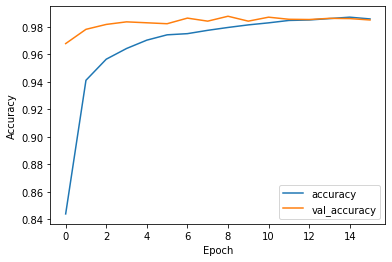

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

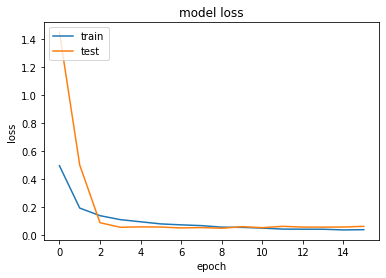

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#save_model(model,'model.h5')

In [ ]:
#model2 = load_model('model.h5')

# Afficher les tests

In [24]:
# load dataset
test = pd.read_csv("C:/Users/Simplon/Google Drive/Nasreddine/Arturo/14 - DEEP LEARNING/03 - MNIST/git/data/test.csv")

In [25]:
test.shape

(28000, 784)

In [26]:
# Normalize the data
test = test/255

In [27]:
test = np.array(test)

In [28]:
 # Reshape dataset to have a single channel
test = test.reshape((test.shape[0], 28, 28, 1))

In [29]:
test.shape

(28000, 28, 28, 1)

In [12]:
model = load_model("C:/Users/Simplon/Google Drive/Nasreddine/Arturo/14 - DEEP LEARNING/03 - MNIST/git/notebooks/model.h5")

In [13]:
prediction = model.predict(test)

In [14]:
prediction = np.argmax(prediction, axis=1)

In [15]:
def test_num_CNN(index):
    #plt.title('Index: %d  Pred: %d Verif: %d' % (index, y_pred[index], y_testR[index]))
    plt.imshow(test[index].reshape([28,28]), cmap=plt.get_cmap('gray'))
    plt.show()

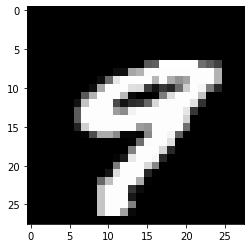

le chiffre reconnu est:  9


In [37]:
############################################################################################
########################### TEST ALEATOIRE #################################################

index = np.random.choice(test.shape[0])
test_num_CNN(index)

print("le chiffre reconnu est: ", prediction[index])

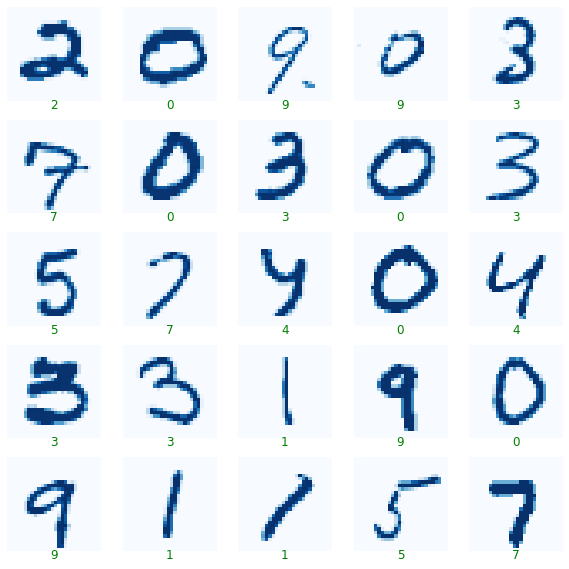

In [38]:
rows = 5 # defining no. of rows
cols = 5 # defining no. of columns

f = plt.figure(figsize=(2*cols, 2*rows)) # defining a figure

for i in range(rows*cols):
    f.add_subplot(rows, cols, i+1) # adding sub plot to figure on each iteration
    plt.imshow(test[i].reshape([28,28]), cmap="Blues")
    plt.axis("off")
    plt.title(str(prediction[i]), y=-0.15, color="green")